In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="white")
sns.set_style("whitegrid")
sns.set(font_scale=3)
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
gear = pd.read_csv("../TP4A/data/gear.csv")
verlet = pd.read_csv("../TP4A/data/verlet.csv")
beeman = pd.read_csv("../TP4A/data/beeman.csv")
analytic = pd.read_csv("../TP4A/data/analytic.csv")
gear['method'] = 'Gear'
verlet['method'] = 'Verlet'
beeman['method'] = 'Beeman'
analytic['method'] = 'Analytic'

df = pd.concat([gear, verlet, beeman, analytic])
df, df.shape

(        t         r         v    method
 0    0.00  1.000000 -0.714286      Gear
 1    0.02  0.957883 -3.464202      Gear
 2    0.04  0.863248 -5.942435      Gear
 3    0.06  0.722878 -8.017692      Gear
 4    0.08  0.545933 -9.584970      Gear
 ..    ...       ...       ...       ...
 246  4.92 -0.016331  0.000000  Analytic
 247  4.94 -0.021443  0.000000  Analytic
 248  4.96 -0.025208  0.000000  Analytic
 249  4.98 -0.027454  0.000000  Analytic
 250  5.00 -0.028098  0.000000  Analytic
 
 [1004 rows x 4 columns],
 (1004, 4))

In [3]:
df.rename(columns={'method': 'método'}, inplace=True)
df['método'].replace('Analytic', 'Analítico', inplace=True)

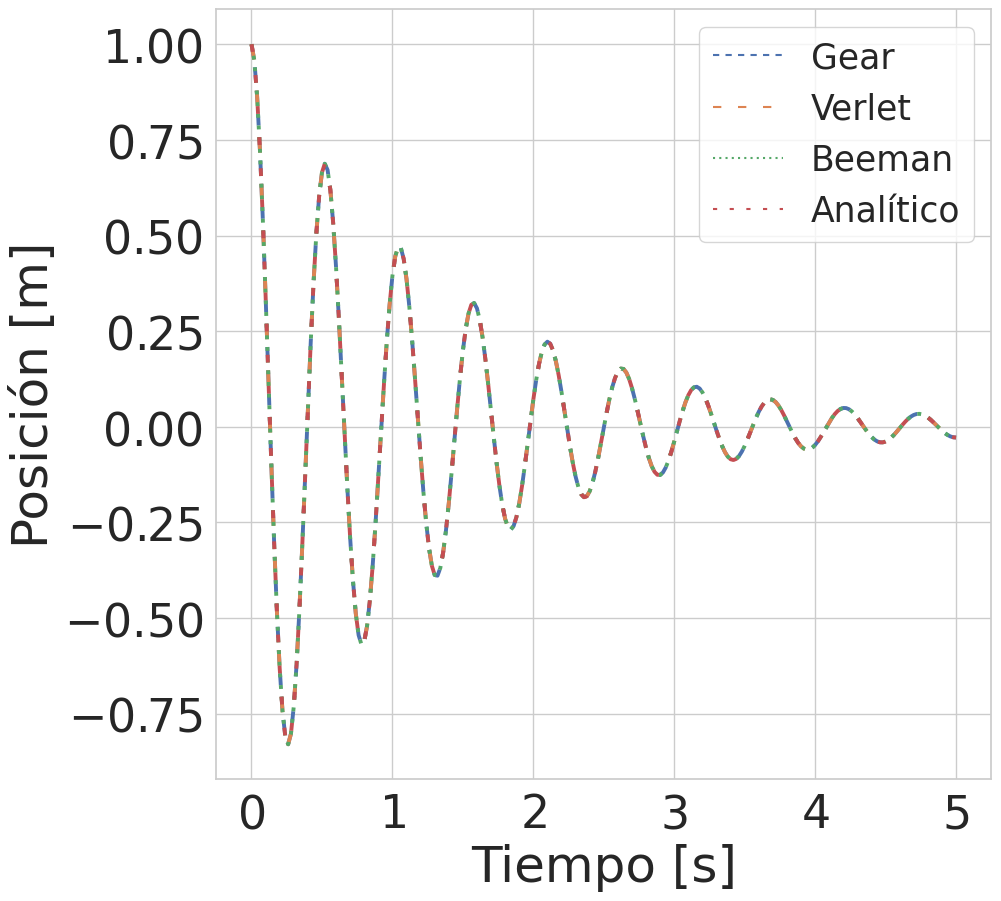

In [4]:
sns.set(style="whitegrid", font_scale=3)
ax = sns.lineplot(data=df.reset_index(), x='t', y='r', hue='método', style='método', dashes=[(3,3),(4,8),(1,2),(2,6)], linewidth=2.8)
ax.ticklabel_format(style='sci', useMathText=True)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Posición [m]')
ax.legend(fontsize='x-small')
sns.set()
plt.show()

In [5]:
import pandas as pd

# Crear la lista con los datos
data = [    
    ['verlet', 1e-9, 0.05137099302157156],
    ['verlet', 1e-8, 0.000000002411252046557098],
    ['verlet', 1e-7, 0.00000000000011212601784992364],
    ['verlet', 1e-6, 0.00000000000481373733657892],
    ['verlet', 1e-5, 0.0000000004813975409621846],
    ['verlet', 1e-4, 0.000000048215752862997493],
    ['verlet', 1e-3, 0.000004897982028031036],
    ['verlet', 1e-2, 0.0005714754087369647],
    ['gear', 1e-9, 0.000000000000013659747295093489],
    ['gear', 1e-8, 0.000000000000000050216861557388746],
    ['gear', 1e-7, 0.0000000000000000007294803500881547],
    ['gear', 1e-6, 0.000000000000000000006783811611228047],
    ['gear', 1e-5, 0.000000000000000015037262166084688],
    ['gear', 1e-4, 0.00000000000015025421113756833],
    ['gear', 1e-3, 0.0000000015027461587853095],
    ['gear', 1e-2, 0.000016964215804883287],
    ['beeman', 1e-9, 0.000000000000013158735328056362],
    ['beeman', 1e-8, 0.0000000000000010626741719761972],
    ['beeman', 1e-7, 0.00000000000009777171343951832],
    ['beeman', 1e-6, 0.000000000009772793922759887],
    ['beeman', 1e-5, 0.0000000009774681478354362],
    ['beeman', 1e-4, 0.00000009793867479892113],
    ['beeman', 1e-3, 0.00000999195222539625],
    ['beeman', 1e-2, 0.0012767609565791486],
]

# Crear el DataFrame
mse = pd.DataFrame(data, columns=['method', 'dt', 'mse'])
mse

,method,dt,mse
0,verlet,1.000000e-09,5.137099e-02
1,verlet,1.000000e-08,2.411252e-09
2,verlet,1.000000e-07,1.121260e-13
3,verlet,1.000000e-06,4.813737e-12
4,verlet,1.000000e-05,4.813975e-10
5,verlet,1.000000e-04,4.821575e-08
6,verlet,1.000000e-03,4.897982e-06
7,verlet,1.000000e-02,5.714754e-04
8,gear,1.000000e-09,1.365975e-14
9,gear,1.000000e-08,5.021686e-17


In [6]:
mse.rename(columns={'mse': 'MSE'}, inplace=True)
mse.rename(columns={'method': 'método'}, inplace=True)
mse.rename(columns={'dt': 'Paso Temporal [s]'}, inplace=True)
mse['método'].replace('verlet', 'Verlet', inplace=True)
mse['método'].replace('gear', 'Gear', inplace=True)
mse['método'].replace('beeman', 'Beeman', inplace=True)

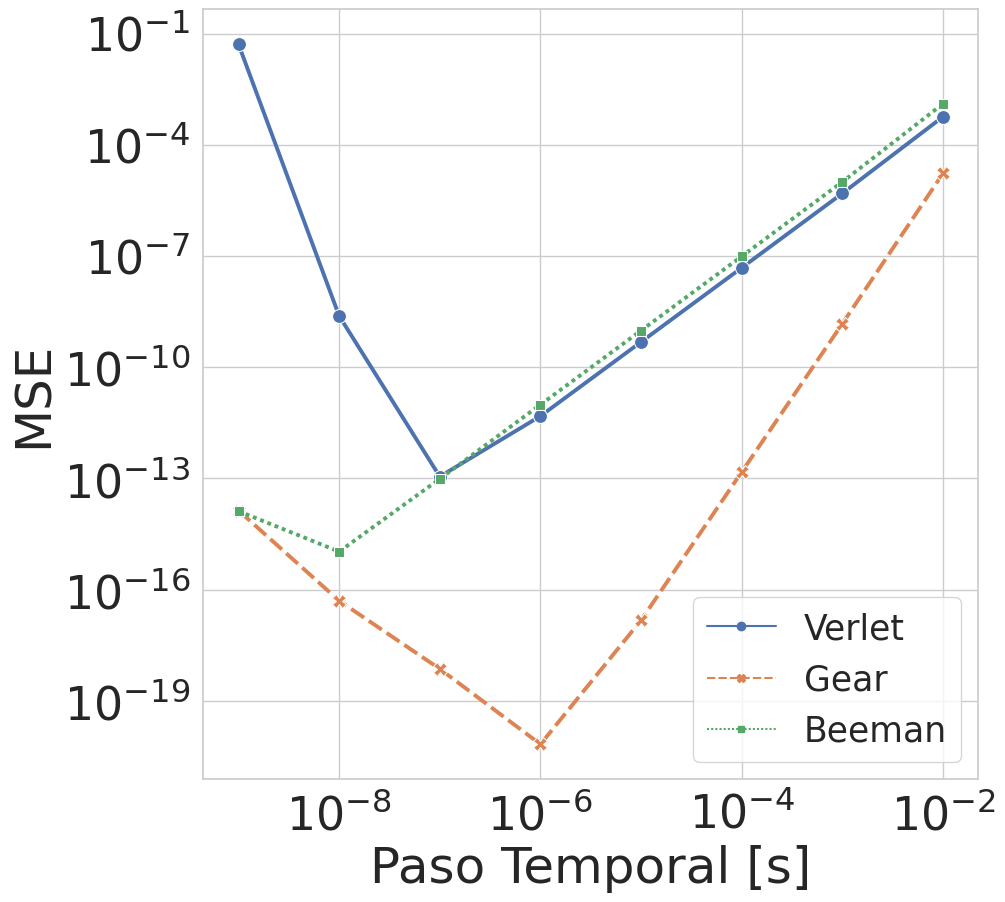

In [7]:
sns.set(font_scale=3, style="whitegrid")
fig, ax = plt.subplots()
sns.lineplot(x="Paso Temporal [s]", y="MSE", hue="método", style="método", markers=True, linewidth=2.8, markersize=10, data=mse ,ax=ax)
ax.set(yscale="log", xscale="log")
ax.legend(fontsize='x-small')
plt.show()